## Simulate the Data
Simulate input-output pairs based on a non-linear target function using uniform sampling. This will serve as the learning ground for neural network models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function definition
def target_function(x):
    return 2 * (2 * (np.cos(x)**2) - 1)**2 - 1

# Generate X values
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 120000)
Y = target_function(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Reshape for Keras
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)


## Construct and Train Neural Network Models
Define a flexible training function that constructs feedforward neural networks with configurable depth (number of hidden layers) and width (number of neurons), then trains them using MSE loss.



In [ ]:
def build_and_train_nn(X_train, Y_train, X_test, Y_test, num_layers, units):
    model = Sequential()
    model.add(Dense(units, input_dim=1, activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    model.fit(X_train, Y_train, epochs=10, batch_size=256, verbose=0)

    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    total_params = model.count_params()

    return mse, total_params


## Evaluate Model Performance Across Architectures
Run controlled experiments by varying network depth and width. For each architecture, capture model performance (MSE) and complexity (parameter count).

In [ ]:
units_list = [20, 40, 60, 80]
results = {}

for num_layers in [1, 2, 3]:
    mse_list = []
    param_list = []
    for units in units_list:
        mse, total_params = build_and_train_nn(X_train, Y_train, X_test, Y_test, num_layers, units)
        mse_list.append(mse)
        param_list.append(total_params)
    results[num_layers] = (units_list.copy(), mse_list.copy(), param_list.copy())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


## Visualize Learning Curves and Model Complexity
Plot the relationship between network architecture (units and parameters) and performance (MSE), highlighting how depth influences learning effectiveness.

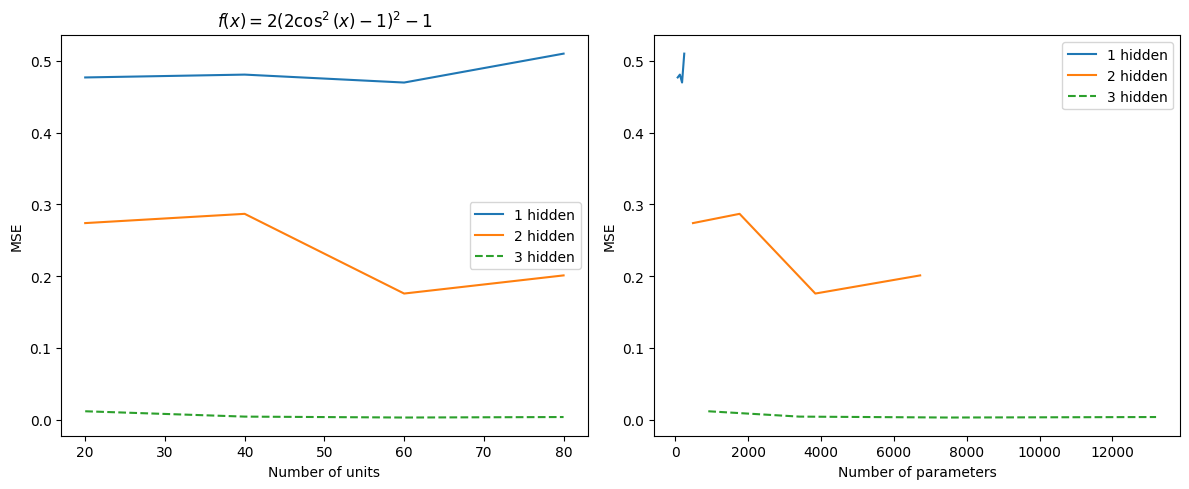

In [ ]:
plt.figure(figsize=(12, 5))

# Plot 1: MSE vs Number of Units
plt.subplot(1, 2, 1)
for num_layers in results:
    plt.plot(results[num_layers][0], results[num_layers][1],
             label=f'{num_layers} hidden',
             linestyle='-' if num_layers < 3 else '--')
plt.xlabel('Number of units')
plt.ylabel('MSE')
plt.title(r'$f(x) = 2(2\cos^2(x) - 1)^2 - 1$')
plt.legend()

# Plot 2: MSE vs Number of Parameters
plt.subplot(1, 2, 2)
for num_layers in results:
    plt.plot(results[num_layers][2], results[num_layers][1],
             label=f'{num_layers} hidden',
             linestyle='-' if num_layers < 3 else '--')
plt.xlabel('Number of parameters')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


The networks were trained to approximate the function:

f(x)=2(2cos^2 (x)−1)^2 −1

This is a non-linear, high-frequency function, making it a good test for neural network expressiveness.

Observations from the Plots
1. Left Plot – MSE vs Number of Units:
---
3 Hidden Layers (green dashed line): Achieves lowest MSE across all unit configurations, converging quickly even with as few as 20 units.

2 Hidden Layers (orange line): Performs better than 1-layer networks, especially as units increase from 40 to 60.

1 Hidden Layer (blue line): Shows poor and mostly flat performance; it seems to underfit the data regardless of units.

2. Right Plot – MSE vs Number of Parameters:
---

Increasing parameters helps 2- and 3-hidden-layer networks reduce error significantly.

3 Hidden Layer model achieves excellent performance with fewer parameters than expected — suggesting it is more efficient in capturing the function.

The 1 Hidden Layer curve may have plotting issues (notice the blue line in the upper left corner is clipped or contains a plotting glitch), or the model may have collapsed during training.


